In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import math
import random

In [22]:
# Coordinates of boundaries of area of Lower Silesian Voivodeship

NORTH =  51.8047222
EAST = 14.8172222
SOUTH = 50.0961111
WEST = 17.795

# Population

#POPULATION = 2898525
POPULATION = 200
AVERAGE_NUMBER_OF_PEOPLE_IN_ONE_HOUSEHOLD_LOWER_SILESIAN = 2.50
NUMBER_OF_HOUSEHOLDS = int(POPULATION/AVERAGE_NUMBER_OF_PEOPLE_IN_ONE_HOUSEHOLD_LOWER_SILESIAN)
NUMBER_OF_HOUSEHOLDS = int(5/6 * NUMBER_OF_HOUSEHOLDS)

# Rectangular network:
HEIGHT = NORTH - SOUTH
WIDTH = WEST - EAST
NUMBER_OF_POINTS = NUMBER_OF_HOUSEHOLDS

NUMBER_OF_NODES_HEIGHT = int(math.sqrt(HEIGHT/WIDTH * NUMBER_OF_POINTS))
NUMBER_OF_NODES_WIDTH = int(NUMBER_OF_POINTS/NUMBER_OF_NODES_HEIGHT)

LENGTH_HEIGHT = HEIGHT/NUMBER_OF_NODES_HEIGHT
LENGTH_WIDTH = WIDTH/NUMBER_OF_NODES_WIDTH

## Rectangular network as neighbourhood

In [3]:
COORDINATES = []
for y in range(NUMBER_OF_NODES_HEIGHT):
    for x in range(NUMBER_OF_NODES_WIDTH):
        COORDINATES.append((x*LENGTH_WIDTH, y*LENGTH_HEIGHT))
        
X_COORDINATES = [x[0] for x in COORDINATES]
Y_COORDINATES = [x[1] for x in COORDINATES]

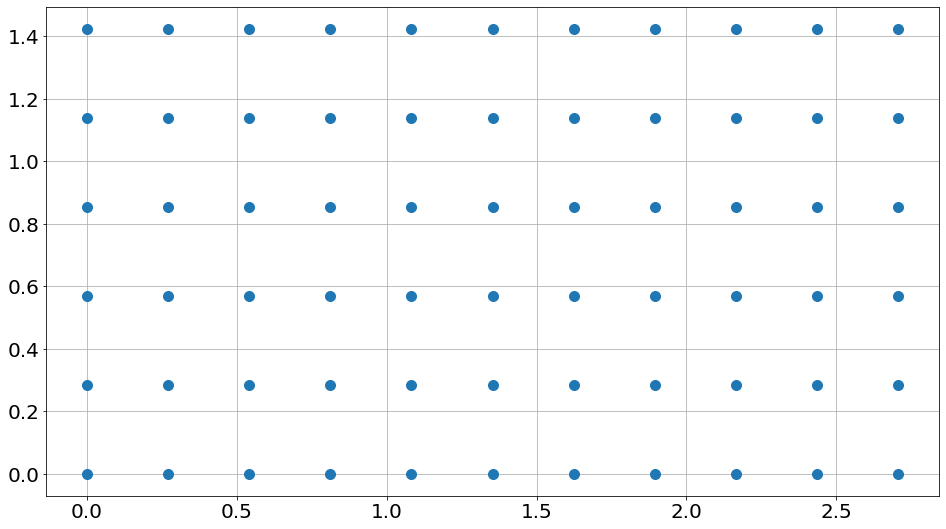

In [4]:
plt.figure(figsize=(16, 9))
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(X_COORDINATES, Y_COORDINATES, '.', markersize=20)
plt.show()

In [5]:
G = nx.grid_2d_graph(NUMBER_OF_NODES_HEIGHT, NUMBER_OF_NODES_WIDTH)
G = nx.convert_node_labels_to_integers(G)

In [6]:
pos = {}
for i, node in enumerate(G.nodes()):
    pos[node] = COORDINATES[i]

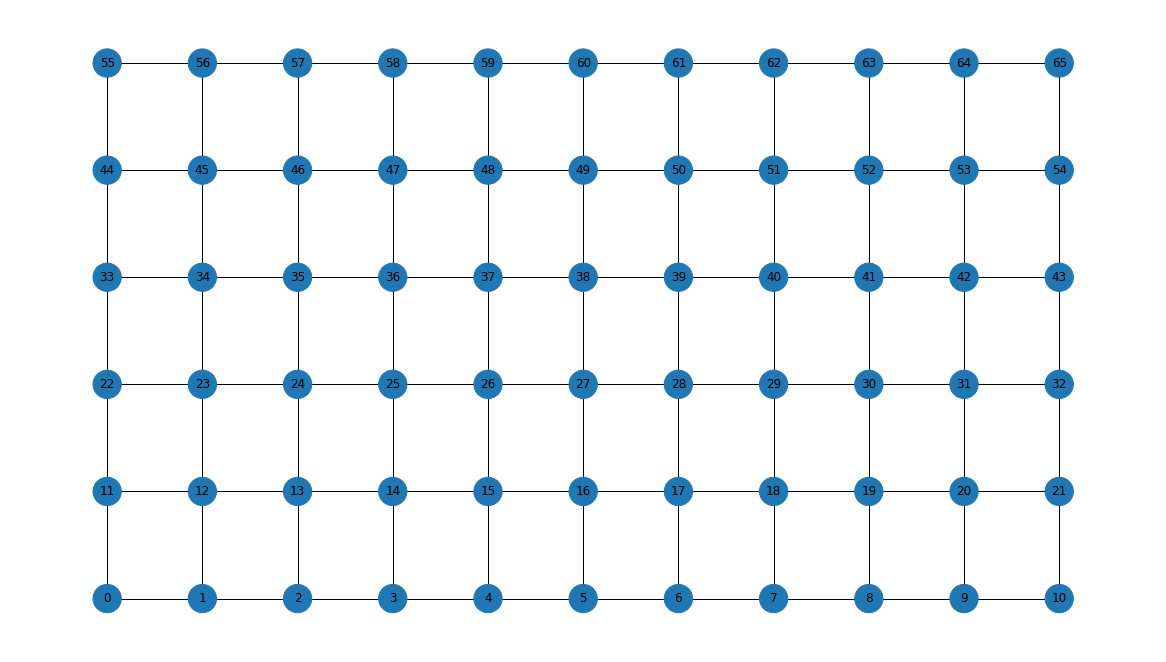

In [7]:
plt.figure(figsize=(16, 9))
nx.draw(G, pos=pos, with_labels=True, node_size=[800]*len(G))

In [8]:
NUMBER_OF_NODES = NUMBER_OF_NODES_HEIGHT*NUMBER_OF_NODES_WIDTH

## Numer of electric vehicles

In [23]:
NUMBER_OF_ELECTRIC_VEHICLES_IN_POLAND = 40000
RATIO_OF_POPULATION_IN_LOWER_SILESIAN = POPULATION/37950000
RATIO_OF_ELECTRIC_VEHICLES = NUMBER_OF_ELECTRIC_VEHICLES_IN_POLAND*RATIO_OF_POPULATION_IN_LOWER_SILESIAN

In [26]:
RATIO_OF_ELECTRIC_VEHICLES = 21 # For small population simulation

## Opinions

In [28]:
opinions = [1]*len(G)
while opinions.count(-1) < RATIO_OF_ELECTRIC_VEHICLES:
    opinions[random.randint(0, len(G)-1)] = -1

## Social interactions

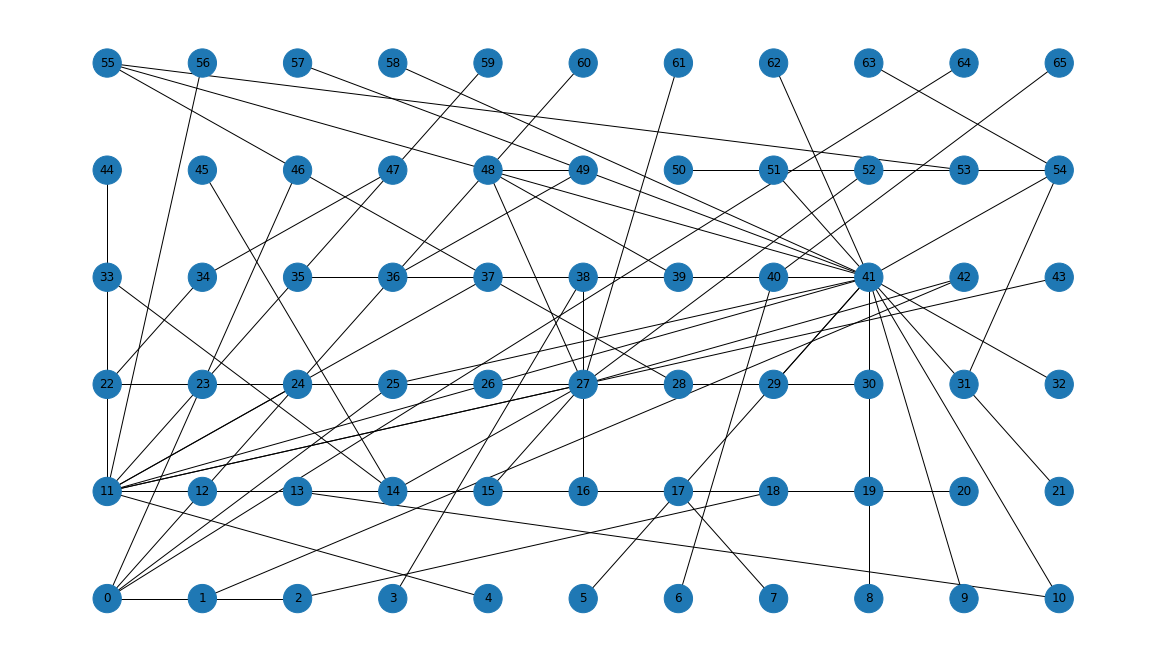

In [9]:
K = nx.barabasi_albert_graph(NUMBER_OF_NODES, 1)
node_mapping = dict(zip(K.nodes(), sorted(K.nodes(), key=lambda k: random.random())))
K = nx.relabel_nodes(K, node_mapping)

plt.figure(figsize=(16, 9))
nx.draw(K, with_labels=True, pos=pos, node_size=[800]*len(K))

## Temporary connection between nodes

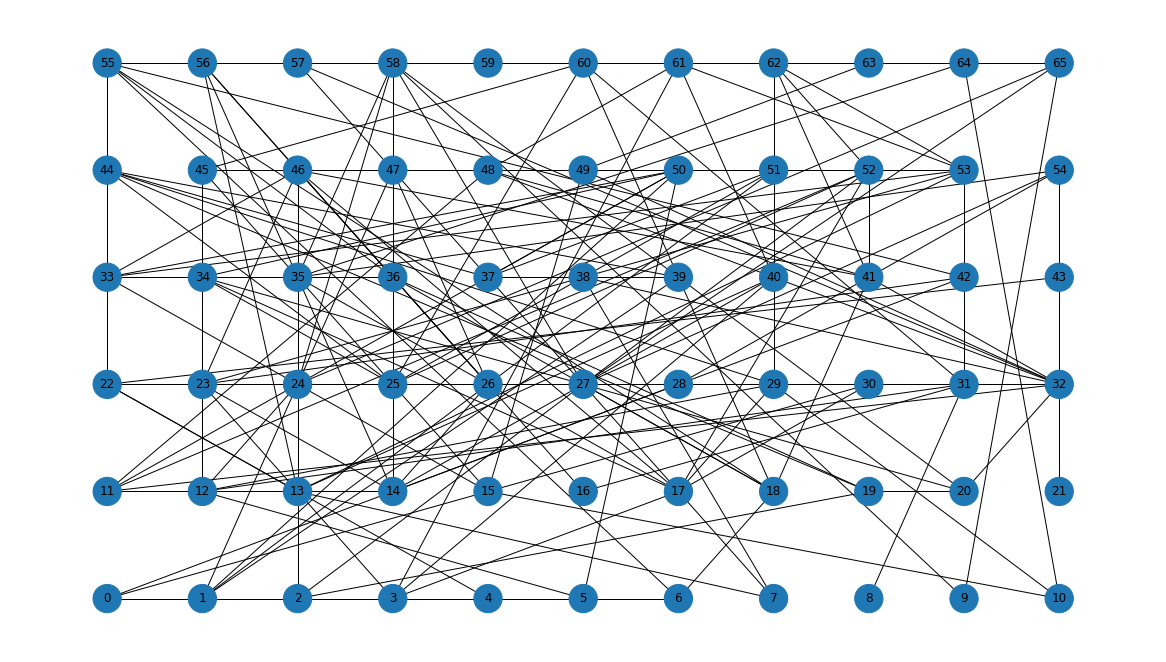

In [10]:
K_temp = nx.fast_gnp_random_graph(len(G.nodes()), 0.07)

plt.figure(figsize=(16, 9))
nx.draw(K_temp, with_labels=True, pos=pos, node_size=[800]*len(K))

## Social media influence

Star graph and center node should be treated as "Star" (information from different type of media e.g. TV, Internet)

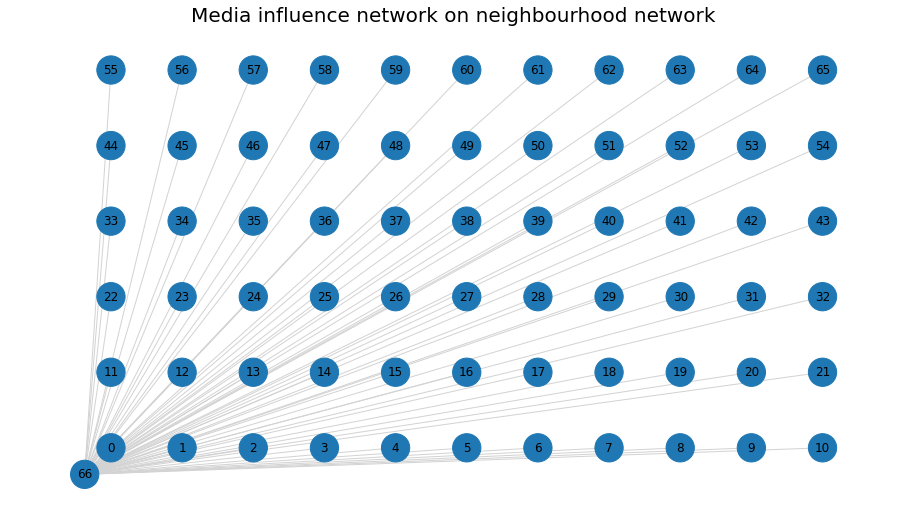

In [11]:
L = nx.star_graph(len(G))
pos[66] = (-0.1, -0.1)
mapping = {0:66, 66:0}
L = nx.relabel_nodes(L, mapping)

attrs = {(66, i): {"media": random.choices([-1, 1], [0.9, 0.1])} for i in range(len(G.nodes()))}
nx.set_edge_attributes(L, attrs)

plt.figure(figsize=(16, 9))
plt.title('Media influence network on neighbourhood network', fontsize=20)
nx.draw(L, edge_color=['lightgray']*len(G), pos=pos, with_labels=True, node_size=[800]*len(L))

## Attributes

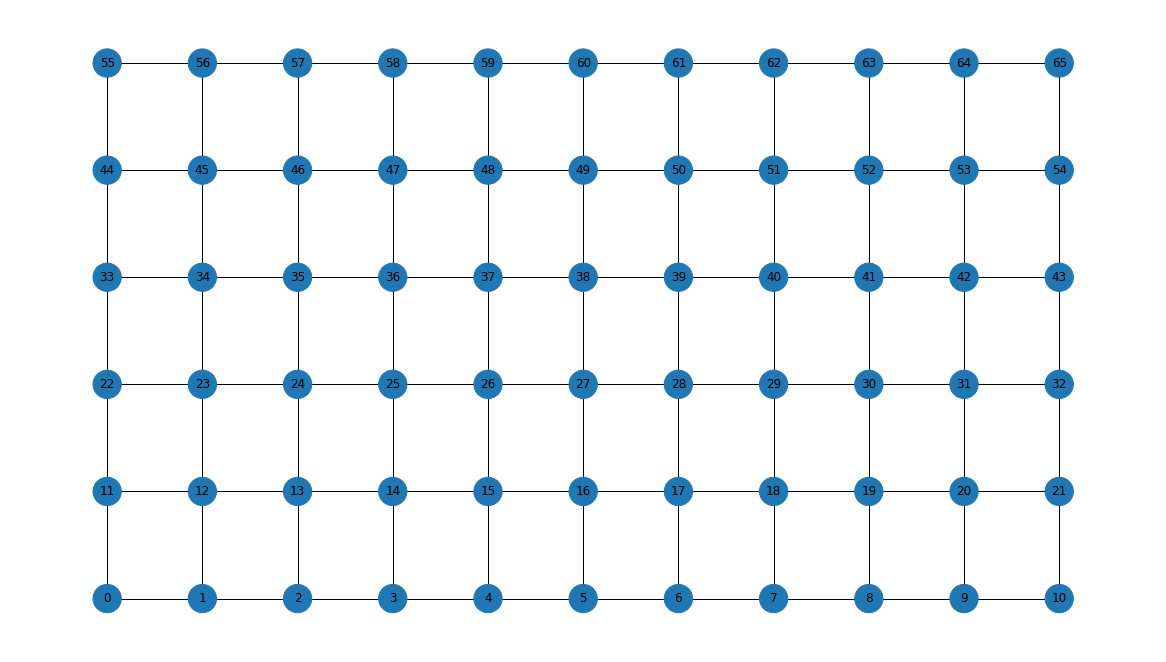

In [12]:
plt.figure(figsize=(16, 9))
A = nx.Graph()
nx.draw(G, pos=pos, with_labels=True, node_size=[800]*len(G))

## Different types of graph

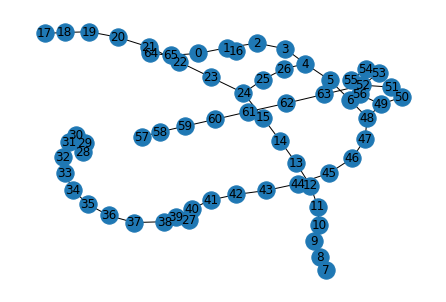

In [13]:
W = nx.watts_strogatz_graph(NUMBER_OF_NODES, 2, 0.1)
nx.draw(W, with_labels=True)

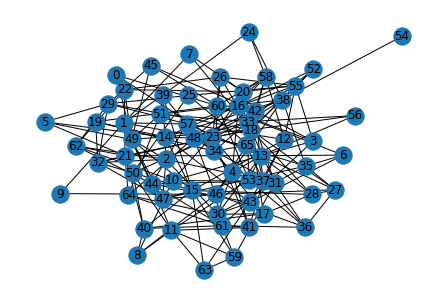

In [14]:
Z = nx.erdos_renyi_graph(NUMBER_OF_NODES, 0.09)
nx.draw(Z, with_labels=True)

## Pickle

#### Networks:

In [15]:
nx.write_gpickle(G, 'network_neighbourhood.pickle')
nx.write_gpickle(K, 'social_neighbourhood.pickle')
nx.write_gpickle(L, 'social_media.pickle')

#### Neighbourhood positions:

In [16]:
with open('neighbourhood_position.pickle', 'wb') as handle:
    pickle.dump(pos, handle)